<a href="https://colab.research.google.com/github/saranya-hash/Object-Recognition-using-CNN/blob/main/Object_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and set up

In [ ]:
#Installing tensor flow
!pip install -q tensorflow-gpu

     |████████████████████████████████| 320.4MB 47kB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data Preprocessing

In [ ]:
#importing the dataset cifar 10 is inbulit dataset
from tensorflow.keras.datasets import cifar10


In [ ]:
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names={'0':'airplane','1':'automobile','2':'bird','3':'cat','4':'deer','5':'dog','6':'frog','7':'horse','8':'ship','9':'truck'}

In [ ]:
print(class_names)

{'0': 'airplane', '1': 'automobile', '2': 'bird', '3': 'cat', '4': 'deer', '5': 'dog', '6': 'frog', '7': 'horse', '8': 'ship', '9': 'truck'}


In [ ]:
x_train.min(),x_train.max(),x_train.mean()

(0, 255, 120.70756512369792)

In [ ]:
y_train.min(),y_train.max()

(0, 9)

In [ ]:
#normalize these images
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train.min(),x_train.max(),x_train.mean()

(0.0, 1.0, 0.4733630004850874)

In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

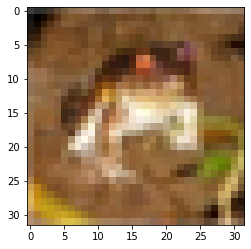

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

# Building CNN

In [ ]:
#Defining the object
model=tf.keras.models.Sequential()

In [ ]:
#Adding first convolutional layer
#number of filters(kernal)=32
#kernal size=3
#padding=same
#activation function=ReLu
#input shape=(32,32,3)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

In [ ]:
#Adding 2nd CNN layer and maxpool layer
#number of filters(kernal)=32
#kernal size=3
#padding=same
#activation function=ReLu
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
#max pool layer parameters
#1.pool size=2
#2.strides=2
#3.padding=valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
#Adding third CNN layer
#number of filters(kernal)=64
#kernal size=3
#padding=same
#activation function=ReLu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))


In [ ]:
#Adding one more CNN and max pool layer
#number of filters(kernal)=64
#kernal size=3
#padding=same
#activation function=ReLu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
#max pool layer parameters
#1.pool size=2
#2.strides=2
#3.padding=valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
#Adding the drop out layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Adding the flatenning layer
model.add(tf.keras.layers.Flatten())

In [ ]:
#adding first dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#adding the second dense layer 
#output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

# Training the model

In [ ]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 307s 61ms/step - loss: 1.4020 - sparse_categorical_accuracy: 0.4931
Epoch 2/10
5000/5000 [==============================] - 309s 62ms/step - loss: 1.0011 - sparse_categorical_accuracy: 0.6459
Epoch 3/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.8574 - sparse_categorical_accuracy: 0.6963
Epoch 4/10
5000/5000 [==============================] - 308s 62ms/step - loss: 0.7700 - sparse_categorical_accuracy: 0.7294
Epoch 5/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.7100 - sparse_categorical_accuracy: 0.7514
Epoch 6/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.6569 - sparse_categorical_accuracy: 0.7672
Epoch 7/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.6177 - sparse_categorical_accuracy: 0.7822
Epoch 8/10
5000/5000 [==============================] - 308s 62ms/step - loss: 0.5838 - sparse_categorical_accuracy: 0.7941
Epoch 9/

In [ ]:
model.save("model_imageclass.h5")

# Model Evaluation and Performance

In [ ]:
#evaluate model performance
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 13s 43ms/step - loss: 0.7475 - sparse_categorical_accuracy: 0.7493


In [ ]:
print(test_acc)

0.7493000030517578


In [ ]:
#prediction
y_pred=model.predict_classes(x_test)

In [ ]:
print(y_pred[0]) 
print(y_test[0])

3
[3]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[797  24  30  12  15   7   8  10  49  48]
 [  8 877   4   5   1   1   4   2  17  81]
 [ 73   4 559  62 129  62  63  19  11  18]
 [ 26  16  43 537  85 158  63  39  14  19]
 [ 17   4  28  42 796  18  40  43   5   7]
 [ 15   6  26 178  64 641  19  32   5  14]
 [  7   5  28  51  59  26 806   4  10   4]
 [ 18   5  30  39  70  50   4 760   3  21]
 [ 55  43   8   8   4   2   8   5 845  22]
 [ 17  66   4   7   3   1   5   8  14 875]]


In [ ]:
acc_cm=accuracy_score(y_test,y_pred)
acc_cm

0.7493

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 

In [ ]:
#loading and display of image
def load_image(filename):
  img=load_img(filename,target_size=(32,32))
  img=img_to_array(img)
  img=img.reshape(1,32,32,3)
  img=img.astype('float32')
  img=img/255.0
  return(img)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


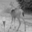

In [ ]:
img=load_img("/content/drive/My Drive/sample_image-1.png",grayscale=True,target_size=(32,32))
display(img)

In [ ]:
def run():
  img=load_image("/content/drive/My Drive/sample_image-1.png")
  model=load_model("model_imageclass.h5")
  r=model.predict_classes(img)
  #print(r[0])
  x=r[0]
  return x
x=run()
print(x)
x=str(x)
print(class_names[x])

4
deer


In [ ]:
def run():
  img=load_image("/content/drive/My Drive/cat.jpg")
  model=load_model("model_imageclass.h5")
  r=model.predict_classes(img)
  #print(r[0])
  x=r[0]
  return x
x=run()
print(x)
x=str(x)
print(class_names[x])

3
cat
